In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline

import sys
sys.path.append("../")
from electronfactors.ellipse.centre import FindCentre
from electronfactors.ellipse.sectorintegration import sector_integration


XCoords = np.array([-4, 4, 4, -4])
YCoords = np.array([4, 4, -4, -4])

# XCoords = np.array([-4,0,4,0])
# YCoords = np.array([0,4,0,-4])

circle_diameter = np.array([3, 4, 5, 6, 7, 8, 9])
circle_factors = np.array(
    [0.9296, 0.9562, 0.9705, 0.9858, 1.0032, 1.0067, 1.0084])


def circle_fit(radii):

    circle_radii = circle_diameter/2

    spline = UnivariateSpline(circle_radii, circle_factors)
    results = spline(radii)

    results[radii > np.max(circle_radii)] = np.max(circle_factors)
    results[radii < np.min(circle_radii)] = 0

    return results

In [2]:
# centre = FindCentre(
#     x=XCoords, y=YCoords, n=1, circle_fit=circle_fit, min_distance=1.5, debug=True
# )
   
# centre.centre

In [3]:
XCoords = np.array([-1,-0.2,0,0.7,1,0])*4
YCoords = np.array([0,-1,-.8,0,.6,1])*4

# centre = FindCentre(
#     x=XCoords, y=YCoords, n=1, circle_fit=circle_fit, min_distance=1.5, debug=True, sectors=100
# )

# centre.centre

In [4]:
# centre.numCalls

In [5]:
import descartes as des

import matplotlib.pyplot as plt
from matplotlib import pylab
%matplotlib inline

In [6]:
# centre.cutout

# fig = plt.figure()
# ax = fig.add_subplot(111)

# patch = des.PolygonPatch(centre.cutout, fc=np.random.uniform(size=3), alpha=0.3)
# ax.add_patch(patch)

# plt.scatter(*centre.centre)

# plt.scatter(0,0)

# ax.axis("equal")

In [7]:
factor = sector_integration(
    x=XCoords,
    y=YCoords,
    min_distance=1.5,
    circle_fit=circle_fit,
    point_of_interest=[-0.1, 0.1],
    num_rays=200
)
factor * 5 + 1.5

6.453072831830637

In [8]:
centre = FindCentre(
    x=XCoords, y=YCoords, n=1, circle_fit=circle_fit, min_distance=1.5, sectors=200, confidence=0.0001
)
centre.centre

array([ -3.46180685e-07,   3.46180685e-07])

(-5.0, 5.0, -5.0, 5.0)

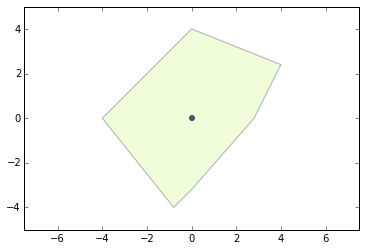

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

patch = des.PolygonPatch(centre.cutout, fc=np.random.uniform(size=3), alpha=0.3)
ax.add_patch(patch)

plt.scatter(*centre.centre)

plt.scatter(0,0)

ax.axis("equal")